### Let's get all the data we used before.

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X, Y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

## OVA Strategy

One way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest).

## OVO Strategy

Another strategy is to train a binary classifier for every pair of digits: one to distin‐
guish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.
This is called the one-versus-one (OvO) strategy. If there are N classes, you need to
train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45
binary classifiers! When you want to classify an image, you have to run the image
through all 45 classifiers and see which class wins the most duels. The main advan‐
tage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

## When two choose what ?

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the
size of the training set, so for these algorithms OvO is preferred since it is faster to
train many classifiers on small training sets than training few classifiers on large
training sets. For most binary classification algorithms, however, OvA is preferred.

## Apply OVA

Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐
class classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO)

In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

array([[-13248.73310098, -31638.80636349,  -4121.37003919,
         -2935.0652894 , -12870.24284072,  -5814.87068146,
          7718.20829617, -27610.17775198,  -1748.39288494,
        -14590.57606159]])

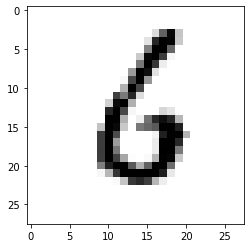

In [21]:
some_digit = X_test[50]
some_digit_scores = sgd_clf.decision_function([some_digit])
plt.imshow(some_digit.reshape(28,28), cmap=mpl.cm.binary, interpolation='nearest')
some_digit_scores

In [17]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

### Highest score is of 6 which is at 6th index in classes array

In [18]:
sgd_clf.classes_[np.argmax(some_digit_scores)]

'6'

## Apply OVO

In [26]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)

array(['6'], dtype=object)

In [28]:
ovo_clf.predict([some_digit])

array(['6'], dtype=object)

In [29]:
len(ovo_clf.estimators_)

45

## Random Forest Classifier

It's same as before because Random Forest
classifiers can directly classify instances into multiple classes. We don't have to run OVO / OVA.

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [31]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
forest_clf.predict([some_digit])

array(['6'], dtype=object)

To get array of probabilities -

In [33]:
forest_clf.predict_proba([some_digit]) 

array([[0.  , 0.  , 0.  , 0.  , 0.01, 0.02, 0.97, 0.  , 0.  , 0.  ]])

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
cross_val_score(sgd_clf, X_train, y_train, cv=2, scoring="accuracy")

array([0.8795    , 0.88853333])

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

Simply scaling the inputs increases accuracy above 89%

In [44]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

1

## Error Analysis

In [46]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)